In [7]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np


file_to_load = "Resources/overdose-death-rates-per-population.csv"

# Read File and store into Pandas data frame
overdose_df = pd.read_csv(file_to_load,sep = ";")

overdose_df



,Location,Year,All Drug Overdose Death Rate (Age-Adjusted),All Drug Overdose Death Rate (Age-Adjusted) (missing reason),Opioid Overdose Death Rate (Age-Adjusted),Opioid Overdose Death Rate (Age-Adjusted) (missing reason),Percent Change in All Drug Overdose Death Rate from Prior Year,Percent Change in All Drug Overdose Death Rate from Prior Year (missing reason),Percent Change in Opioid Overdose Death Rate from Prior Year,Percent Change in Opioid Overdose Death Rate from Prior Year (missing reason)
0,Maryland,2012,13.7,NaN,10.9,NaN,0.17,NaN,0.20,NaN
1,Arizona,2015,19.0,NaN,10.2,NaN,0.04,NaN,0.16,NaN
2,Vermont,2003,10.2,NaN,7.2,NaN,0.36,NaN,0.24,NaN
3,Kansas,2008,8.0,NaN,3.5,NaN,-0.20,NaN,-0.20,NaN
4,Idaho,2009,11.6,NaN,4.2,NaN,0.18,NaN,-0.13,NaN
...,...,...,...,...,...,...,...,...,...,...
862,Arizona,2000,10.6,NaN,4.8,NaN,0.00,NaN,0.02,NaN
863,North Carolina,2012,13.3,NaN,8.6,NaN,0.02,NaN,0.00,NaN
864,Nebraska,2010,6.7,NaN,3.4,NaN,0.14,NaN,-0.08,NaN
865,Virginia,2006,8.0,NaN,5.3,NaN,0.07,NaN,0.13,NaN


In [ ]:
overdose_df.count() 

In [ ]:
overdose_df.dtypes

# Statistics Analysis By States

In [9]:
#group data by states
grouped_overdose_bystate = overdose_df.groupby(["Location"])

In [10]:
#get a serie of average opioid overdose death rate 
ave_death_rate_opioid = grouped_overdose_bystate['Opioid Overdose Death Rate (Age-Adjusted)'].mean()
#ave_death_rate_opioid

In [11]:
#a serie of ave all drug overdose death rate 
ave_death_rate_drugs = grouped_overdose_bystate['All Drug Overdose Death Rate (Age-Adjusted)'].mean()
#ave_death_rate_drugs

In [14]:
# make a dataframe that contains all drugs and opioid ave death rates 
ave_death_rate_bystate_df = pd.DataFrame([ave_death_rate_drugs,ave_death_rate_opioid])

#switch rows and columns for the new dataframe
ave_death_rate_bystate_df = ave_death_rate_bystate_df.T


ave_death_rate_bystate_df.head()


,All Drug Overdose Death Rate (Age-Adjusted),Opioid Overdose Death Rate (Age-Adjusted)
Location,,
Alabama,9.464706,3.000000
Alaska,12.976471,8.736364
Arizona,14.870588,7.511765
Arkansas,10.000000,4.841176
California,9.364706,4.288235


In [ ]:
# to get a list of states (i.e., location) from the new dataframe
#reset_ave_death_rate_bystate_df = ave_death_rate_bystate_df.reset_index()
#list_of_states = list(reset_ave_death_rate_bystate_df['Location'])

# Bar Graph of death rates grouped by states

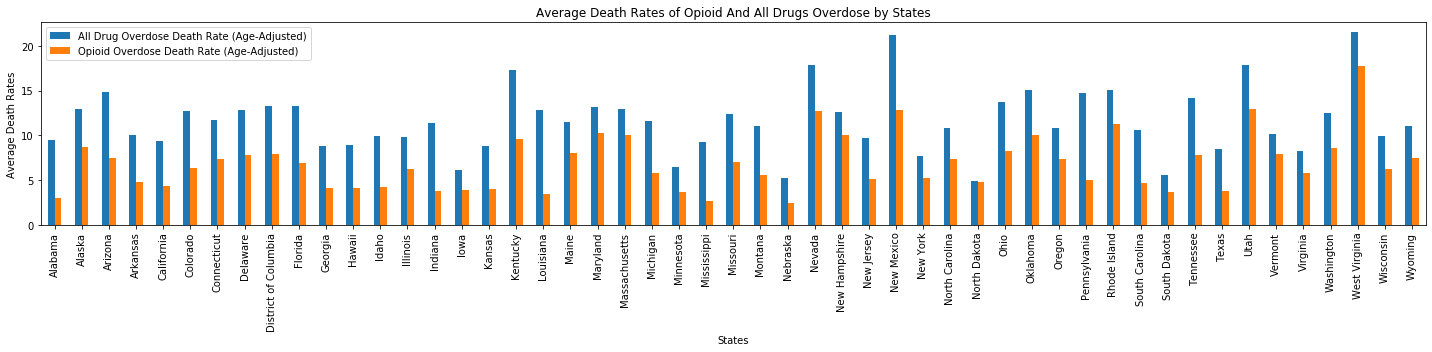

In [6]:
# Use DataFrame.plot() in order to create a bar chart of the data
# panda is using maplot underneath
ave_death_rate_bystate_df.plot(kind="bar", figsize=(20,5))

# Set a title and labels for the chart
plt.title("Average Death Rates of Opioid And All Drugs Overdose by States")
plt.xlabel("States")
plt.ylabel("Average Death Rates")
#display and show the figure
plt.tight_layout()
plt.savefig("images/bar_avg_death_rate_bystate.png")
plt.show()


# Regression Analysis for All drugs Overdoes Death Rate and Opioid Overdose Death Rate 

In [10]:
# Set regression line
x_axis = ave_death_rate_bystate_df["Opioid Overdose Death Rate (Age-Adjusted)"]
y_axis = ave_death_rate_bystate_df["All Drug Overdose Death Rate (Age-Adjusted)"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis,y_axis)
fit = slope * x_axis + intercept


0.8442770744240523

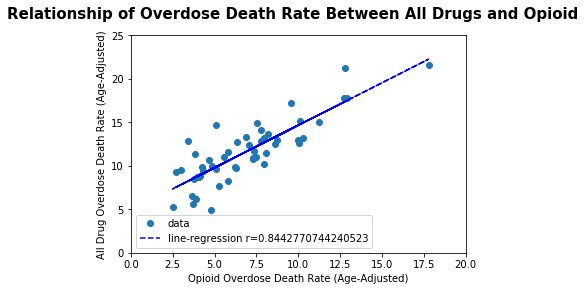

In [44]:
# Plot data
fig, ax = plt.subplots()

fig.suptitle("Relationship of Overdose Death Rate Between All Drugs and Opioid", fontsize=15, fontweight="bold")

ax.set_xlim(0, 20)
ax.set_ylim(0, 25)


ax.set_xlabel("Opioid Overdose Death Rate (Age-Adjusted)")
ax.set_ylabel("All Drug Overdose Death Rate (Age-Adjusted)")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')
plt.legend(('data', 'line-regression r={}'.format(rvalue)))
#plt.savefig("images/linear_regression_death_rate.png")
plt.show()


In [45]:
print("--------------------------------")
print("summary:")
print(f"since the r = {rvalue} that is close to 1, \
the relationship between all drugs overdose death rate and opioid death rate is very strong")
print("--------------------------------")

--------------------------------
summary:
since the r = 0.8442770744240523 that is close to 1, the relationship between all drugs overdose death rate and opioid death rate is very strong
--------------------------------


# Statistics Analysis By Years

In [47]:
grouped_overdose_byyear = overdose_df.groupby(["Year"])
grouped_overdose_byyear.count()

,Location,All Drug Overdose Death Rate (Age-Adjusted),All Drug Overdose Death Rate (Age-Adjusted) (missing reason),Opioid Overdose Death Rate (Age-Adjusted),Opioid Overdose Death Rate (Age-Adjusted) (missing reason),Percent Change in All Drug Overdose Death Rate from Prior Year,Percent Change in All Drug Overdose Death Rate from Prior Year (missing reason),Percent Change in Opioid Overdose Death Rate from Prior Year,Percent Change in Opioid Overdose Death Rate from Prior Year (missing reason)
Year,,,,,,,,,
1999,51,49,2,43,8,0,51,0,51
2000,51,50,1,44,7,49,2,43,8
2001,51,50,1,47,4,50,1,43,8
2002,51,50,1,47,4,50,1,47,4
2003,51,51,0,46,5,50,1,46,5
2004,51,50,1,48,3,50,1,46,5
2005,51,50,1,48,3,50,1,48,3
2006,51,50,1,49,2,50,1,48,3
2007,51,51,0,49,2,50,1,48,3


In [48]:
#get a serie of average opioid overdose death rate by year 
ave_death_rate_opioid_byyear = grouped_overdose_byyear['Opioid Overdose Death Rate (Age-Adjusted)'].mean()
#get a dataframe of ave opioid death rate by year
ave_death_rate_opioid_byyear_df = pd.DataFrame(ave_death_rate_opioid_byyear)
ave_death_rate_opioid_byyear_df = ave_death_rate_opioid_byyear_df.reset_index()


In [49]:
#to get a list of years 
list_of_year = list(ave_death_rate_opioid_byyear_df['Year'])

# Scatterplot for Ave Death Rate of Opioid Overdose

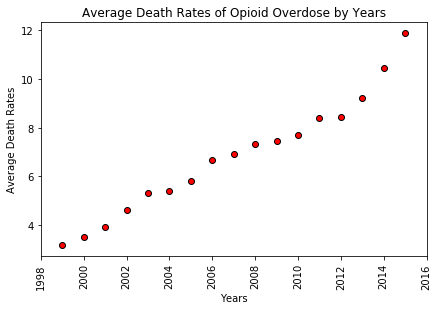

In [55]:
#to create a scatter plot 

plt.scatter(list_of_year, ave_death_rate_opioid_byyear, marker="o", facecolors="red", edgecolors="black")
# Tell matplotlib where we would like to place each of our x axis headers
x_axis = np.arange(len(ave_death_rate_opioid_byyear))
#===========================================
#random draft
#tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations, list_of_year,rotation=90)
#===========================================
plt.xticks(rotation=90)
plt.xlim(1998,2016)
plt.tight_layout()
plt.title("Average Death Rates of Opioid Overdose by Years")
plt.xlabel("Years")
plt.ylabel("Average Death Rates")

plt.savefig("images/scatter_avg_death_rate_opioid_byyear.png")
plt.show()

# Death Rate with Unemployment Rate

In [149]:
#create a file path for unemployment rates from 1999-2018
unemployment_file = "Resources/unemploy_rate_1999_2018.csv"
#read file and save to pandas dataframe
unemployment_df = pd.read_csv(unemployment_file)

unemployment_df

,Unnamed: 0,Unemployment rate
0,1999.0,4.2
1,2000.0,4.0
2,2001.0,4.7
3,2002.0,5.8
4,2003.0,6.0
5,2004.0,5.5
6,2005.0,5.1
7,2006.0,4.6
8,2007.0,4.6
9,2008.0,5.8


In [157]:
#to make the dataframe nicer 
unemployment_df = unemployment_df.rename(columns={"Unnamed: 0": "Year"})
unemployment_df = unemployment_df.dropna()
unemployment_df["Year"] = unemployment_df["Year"].astype('int32')
#df.astype('int32').dtypes
#reset_unemployment_df = unemployment_df.set_index(["Year"])
#reset_unemployment_df
#only select years from 1999-2015
new_unemployment_df = unemployment_df.drop([17,18,19])
new_unemployment_df
#new_unemployment_df
 	
# Drop Colums a & b from dfObj in place
#dfObj.drop(['a' , 'b'], inplace=True)

,Year,Unemployment rate
0,1999,4.2
1,2000,4.0
2,2001,4.7
3,2002,5.8
4,2003,6.0
5,2004,5.5
6,2005,5.1
7,2006,4.6
8,2007,4.6
9,2008,5.8


# Regression Analysis between Opioid Overdose Death Rate and Unemployment Rate

In [162]:
# Set regression line
x_axis1 = ave_death_rate_opioid_byyear_df["Opioid Overdose Death Rate (Age-Adjusted)"]
y_axis1 = new_unemployment_df["Unemployment rate"]
(slope1, intercept1, rvalue1, pvalue1, stderr1) = stats.linregress(x_axis1,y_axis1)
fit1 = slope1 * x_axis1 + intercept1
y_axis1

0     4.2
1     4.0
2     4.7
3     5.8
4     6.0
5     5.5
6     5.1
7     4.6
8     4.6
9     5.8
10    9.3
11    9.6
12    8.9
13    8.1
14    7.4
15    6.2
16    5.3
Name: Unemployment rate, dtype: float64

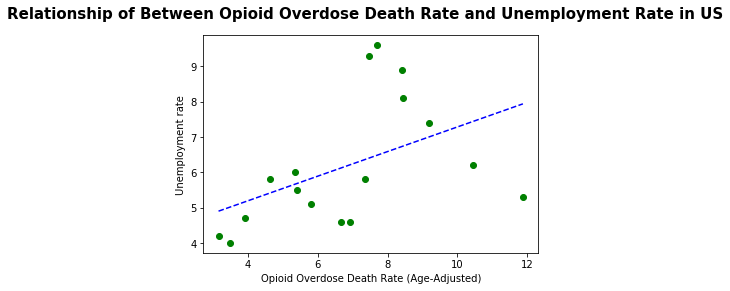

In [165]:
fig, ax = plt.subplots()

fig.suptitle("Relationship of Between Opioid Overdose Death Rate and Unemployment Rate in US", fontsize=15, fontweight="bold")

#ax.set_xlim(0, 20)
#ax.set_ylim(0, 25)


ax.set_xlabel("Opioid Overdose Death Rate (Age-Adjusted)")
ax.set_ylabel("Unemployment rate")

ax.plot(x_axis1, y_axis1, linewidth=0, marker='o',color = 'g')
ax.plot(x_axis1, fit1, 'b--')
#plt.legend(('data', 'line-regression r={}'.format(rvalue1)))
#plt.savefig("images/linear_regression_death_rate.png")
plt.show()

In [166]:
print("--------------------------------")
print("summary:")
if rvalue1>.5:
    print(f"since the r = {rvalue1} is close to 1, \
    the relationship between all drugs overdose death rate and opioid death rate is very strong")
else:
    print(f"since the r = {rvalue1} is close to 0, \
    the relationship between opioid overdose death rate and unemployment rate seems not to be strong ")
print("--------------------------------")

--------------------------------
summary:
since the r = 0.4661278204243403 is close to 0,     the relationship between opioid overdose death rate and unemployment rate seems not to be strong 
--------------------------------


# Data Analysis By Regions 

In [15]:
#create a file path for states including regions
region_file = "Resources/us_regions_divisions.csv"
#read file and save to pandas dataframe
region_df = pd.read_csv(region_file)

region_df.head()

,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific


In [35]:
reset_df = ave_death_rate_bystate_df.reset_index()

In [39]:
#to make a common column for merging
#unemployment_df.rename(columns={"Unnamed: 0": "Year"})
rename_df = reset_df.rename(columns={"Location":"State"})



In [41]:
#to merge regions dataframe to origional dataframe 
merged_df = pd.merge(rename_df, region_df, on="State")
merged_df.head()

,State,All Drug Overdose Death Rate (Age-Adjusted),Opioid Overdose Death Rate (Age-Adjusted),State Code,Region,Division
0,Alabama,9.464706,3.000000,AL,South,East South Central
1,Alaska,12.976471,8.736364,AK,West,Pacific
2,Arizona,14.870588,7.511765,AZ,West,Mountain
3,Arkansas,10.000000,4.841176,AR,South,West South Central
4,California,9.364706,4.288235,CA,West,Pacific


In [45]:
#grouped_region_df = 
grouped_region_df = merged_df.groupby(["Region"])
grouped_region_df.count()

,State,All Drug Overdose Death Rate (Age-Adjusted),Opioid Overdose Death Rate (Age-Adjusted),State Code,Division
Region,,,,,
Midwest,12,12,12,12,12
Northeast,9,9,9,9,9
South,17,17,17,17,17
West,13,13,13,13,13


In [ ]:
#to create a scatter plot 

plt.scatter(list_of_year, ave_death_rate_opioid_byyear, marker="o", facecolors="red", edgecolors="black")
# Tell matplotlib where we would like to place each of our x axis headers
x_axis = np.arange(len(ave_death_rate_opioid_byyear))
#===========================================
#random draft
#tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations, list_of_year,rotation=90)
#===========================================
plt.xticks(rotation=90)
plt.xlim(1998,2016)
plt.tight_layout()
plt.title("Average Death Rates of Opioid Overdose by Years")
plt.xlabel("Years")
plt.ylabel("Average Death Rates")

plt.savefig("images/scatter_avg_death_rate_opioid_byyear.png")
plt.show()